# Coin Flips

Given n coin flips, what's the probability of the next coin being head or tail?

In [19]:
import pymc as pm
import numpy as np
import pytensor
import pytensor.tensor as pt
import arviz as az
import matplotlib.pyplot as plt

In [20]:
# Define the data: 10 flips of a coin, where 1 represents "heads" and 0 represents "tails"
data = np.array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

# Define the prior probabilities for the next coin being head or tail
p_head = 0.5
p_tail = 0.5

# Define the PyMC5 model
with pm.Model() as model:
    # Define the prior for the coin being head or tail using a Uniform distribution
    head_prob = pm.Uniform("head_prob", lower=0, upper=1)
    
    # Define the likelihood using a Bernoulli distribution
    likelihood = pm.Bernoulli("likelihood", p=head_prob, observed=data)

# Run the PyMC5 sampler to obtain posterior samples
with model:
    trace = pm.sample(1000)

# Print the posterior probabilities for the coin being head or tail.
# When correct, the probability of heads should be close to 0.8 (since the prior data
# gave us 8 heads and 2 tails).
print("Posterior probabilities:")
print("Heads likelihood:", np.mean(trace.posterior["head_prob"]))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [head_prob]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


Posterior probabilities:
Heads likelihood: <xarray.DataArray 'head_prob' ()>
array(0.75112085)


In [21]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

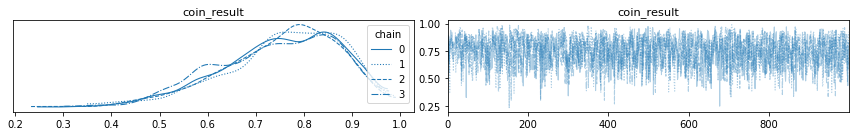

In [18]:

# Plot the posterior distributions
ax = az.plot_trace(trace, var_names=["head_prob"], legend=True);

plt.tight_layout()